<a href="https://colab.research.google.com/github/Imrane-98/EDA-Python/blob/main/EDA_%26_Cleaning_Sleep_Health_and_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load and Inspect the Data.**

In [ ]:
import pandas as pd

df = data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Step 2: Summary Statistics**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# Summary statistics for numerical variables
print(data.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [ ]:
# Summary of categorical variables
# 'O' stands for object type, typically used for categorical data
print(data.describe(include='O'))

       Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     374        374          374            374            155
unique      2         11            4             25              2
top      Male      Nurse       Normal         130/85    Sleep Apnea
freq      189         73          195             99             78


**Step 3: Data Cleaning**

In [ ]:
print(data.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [ ]:
data = data.dropna()
data = data.drop_duplicates()

In [ ]:
print(data.isnull().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [ ]:
display(data)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


**Step 4: Univariate Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

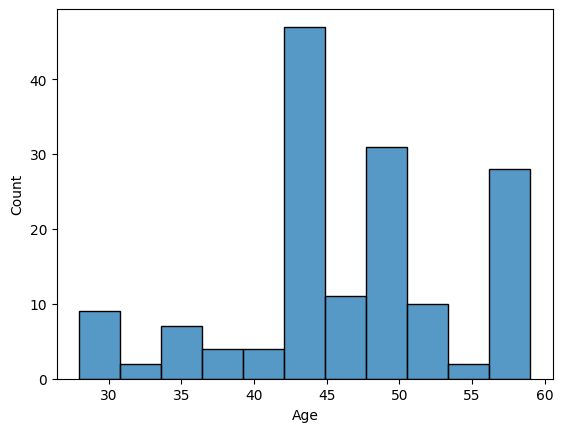

In [ ]:
sns.histplot(data['Age'])
plt.show()

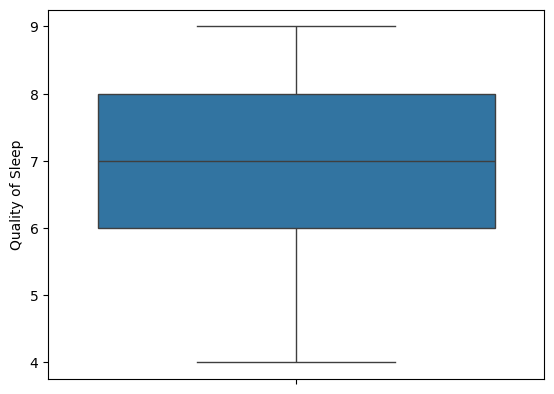

In [ ]:
sns.boxplot(data = df['Quality of Sleep'])
plt.show()

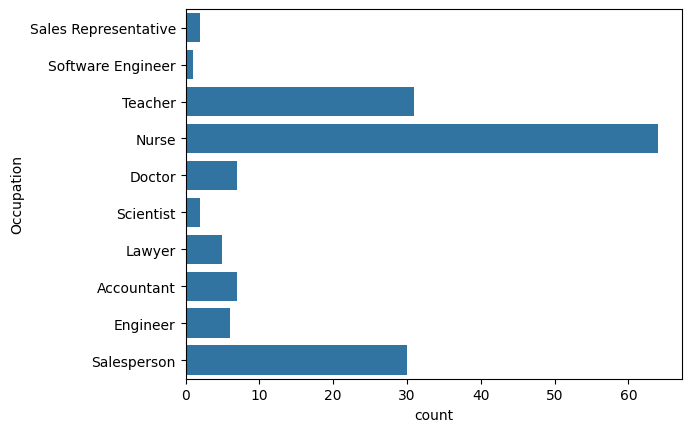

In [ ]:
sns.countplot(data['Occupation'])
plt.show()

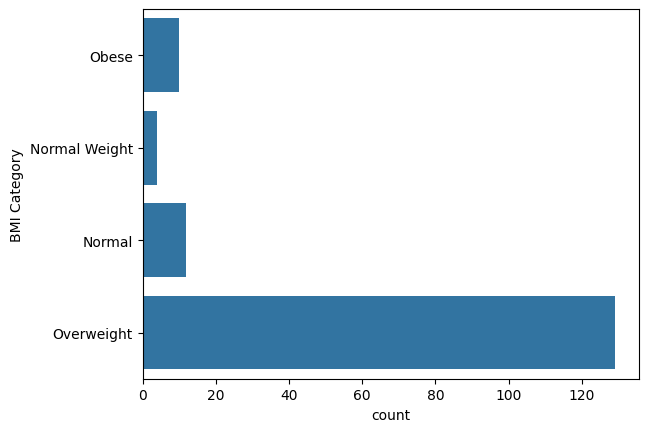

In [ ]:
sns.countplot(data['BMI Category'])
plt.show()

In [ ]:
data['BMI Category'] = data['BMI Category'].str.replace('Normal Weight', 'Normal')
df = pd.DataFrame(data)

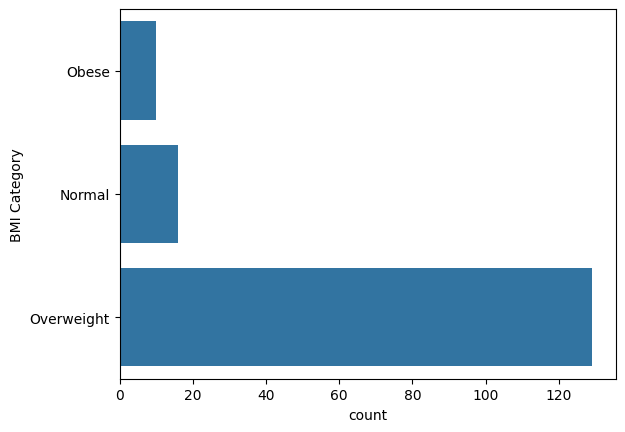

In [ ]:
sns.countplot(data['BMI Category'])
plt.show()

**Step 5: Bivariate Analysis**
* Numerical vs. Numerical Analysis: <br>
Examining relationships between numerical variables using scatter plots.

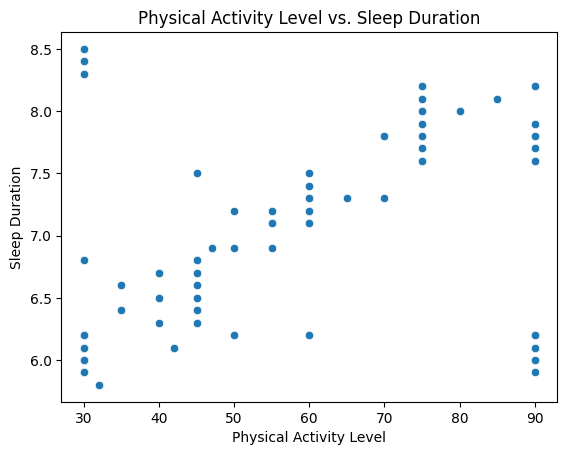

In [ ]:
# Scatter plot of Sleep Duration vs. Physical Activity Level
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title("Physical Activity Level vs. Sleep Duration")
plt.show()

* Numerical vs. Categorical Analysis: <br>
Examining relationships between numerical and categorical variables using box plots and violin plots.



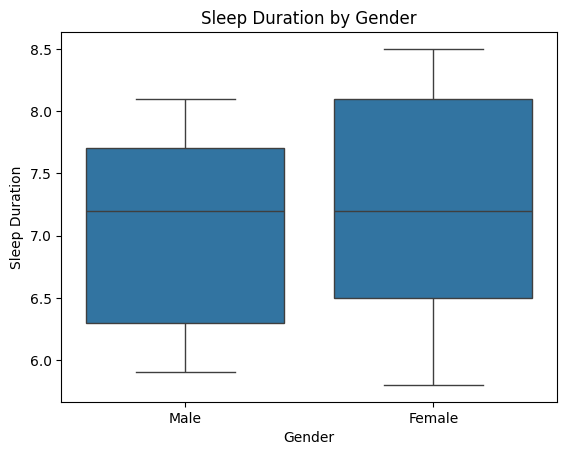

In [ ]:
# Box plot to compare Sleep Duration across Gender
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title("Sleep Duration by Gender")
plt.show()

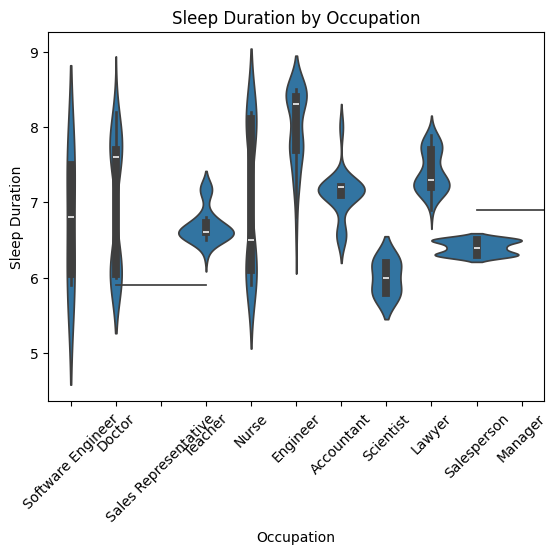

In [ ]:
# Violin plot for Sleep Duration by Occupation
sns.violinplot(x='Occupation', y='Sleep Duration', data=df, width = 2)
plt.title("Sleep Duration by Occupation")
plt.xticks(rotation=45)
plt.show()

* Categorical vs. Categorical Analysis: <br>
Examining relationships between categorical variables.

In [ ]:
# Contingency table for Gender and BMI Category
contingency_table = pd.crosstab(df['Gender'], df['BMI Category'])
print(contingency_table)

BMI Category  Normal  Obese  Overweight
Gender                                 
Female             7      1          95
Male               9      9          34


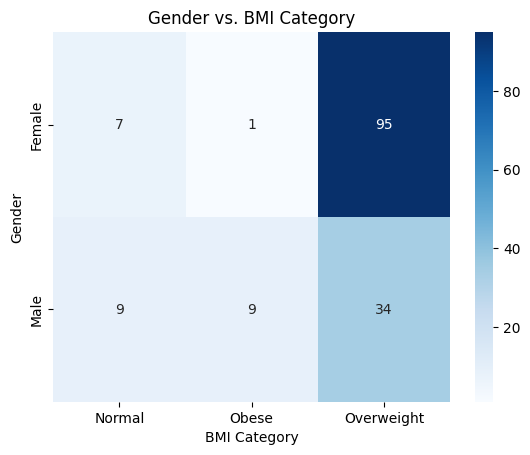

In [ ]:
# Heatmap for Gender and BMI Category
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title("Gender vs. BMI Category")
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)  # Afficher toutes les lignes
display(data)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
17,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Insomnia
30,31,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Sleep Apnea
31,32,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Insomnia
49,50,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,Sleep Apnea
